In [245]:
import numpy as np
import matplotlib.pyplot as plt

## Simple LM model

In [246]:
def min_sq(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(y - y_bar, x - x_bar) / np.linalg.norm(x - x_bar)**2
    beta_0 = y_bar - beta_1 * x_bar
    return [beta_1, beta_0]

In [247]:
np.random.seed(91)
N = 100

a = np.random.normal(loc=2, scale=1, size=N)
b = np.random.randn(1)
x = np.random.randn(N)
y = a * x + b + np.random.randn(N)

a1, b1 = min_sq(x, y)
print(a1, b)

2.203817943318935 [-0.6781313]


In [248]:
xx = x - np.mean(x)
yy = y - np.mean(y)

a2, b2 = min_sq(xx, yy)
print(a2, b2)

2.203817943318935 2.936254619112371e-17


In [249]:
x_seq = np.arange(-5, 5, 0.1)
y_pre = b1 + x_seq * a1
yy_pre = b2 + x_seq * a2

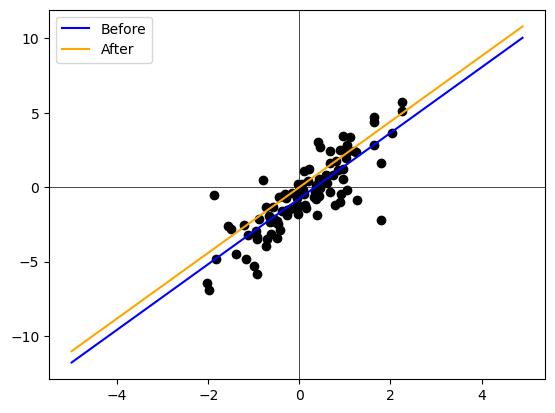

In [250]:
plt.scatter(x, y, c='black')
plt.axhline(y=0, c='black', linewidth=0.5)
plt.axvline(x=0, c='black', linewidth=0.5)
plt.plot(x_seq, y_pre, c='blue', label='Before')
plt.plot(x_seq, yy_pre, c='orange', label='After')
plt.legend(loc='upper left')

## Multiple Regression

In [251]:
N = 100
p = 2
beta = np.array([1, 2, 3])
x = np.random.randn(N, p)
y = beta[0] + beta[1] * x[:, 0] + beta[2] * x[:, 1] + np.random.randn(N)
X = np.insert(x, 0, 1, axis=1)

np.linalg.inv(X.T@X)@X.T@y

array([0.90278533, 1.7945634 , 2.99273718])

In [303]:
X = np.random.randn(4, 2)
print(X)

[[-0.84830574 -0.95729779]
 [-1.47338457  0.06151869]
 [-1.2323359   0.18845544]
 [ 0.72193608 -0.54142254]]


In [304]:
H = X@np.linalg.inv(X.T@X)@X.T
I = np.diag(np.ones(H.shape[0]))
print(H)
print(I)
H = I - H

[[ 0.85517036  0.18495169  0.05137008  0.29497119]
 [ 0.18495169  0.44693497  0.38380338 -0.25626537]
 [ 0.05137008  0.38380338  0.34441908 -0.27540998]
 [ 0.29497119 -0.25626537 -0.27540998  0.35347559]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [307]:
H

array([[ 0.14482964, -0.18495169, -0.05137008, -0.29497119],
       [-0.18495169,  0.55306503, -0.38380338,  0.25626537],
       [-0.05137008, -0.38380338,  0.65558092,  0.27540998],
       [-0.29497119,  0.25626537,  0.27540998,  0.64652441]])

In [306]:
H@H.T

array([[ 0.14482964, -0.18495169, -0.05137008, -0.29497119],
       [-0.18495169,  0.55306503, -0.38380338,  0.25626537],
       [-0.05137008, -0.38380338,  0.65558092,  0.27540998],
       [-0.29497119,  0.25626537,  0.27540998,  0.64652441]])

In [308]:
eigenvalues, eigenvectors = np.linalg.eig(H)

In [310]:
eigenvectors@np.diag(eigenvalues)@np.linalg.inv(eigenvectors) - H

array([[-2.77555756e-17, -8.32667268e-17,  0.00000000e+00,
         0.00000000e+00],
       [-2.77555756e-17,  0.00000000e+00,  0.00000000e+00,
        -5.55111512e-17],
       [-6.93889390e-18,  1.11022302e-16, -2.22044605e-16,
        -1.11022302e-16],
       [ 0.00000000e+00, -5.55111512e-17,  5.55111512e-17,
         1.11022302e-16]])

In [311]:
eigenvectors@np.diag(eigenvalues)@eigenvectors.T - H

array([[ 0.00131855,  0.01866351, -0.02932495, -0.010418  ],
       [ 0.01866351, -0.05270289,  0.03432322, -0.02704053],
       [-0.02932495,  0.03432322,  0.0148342 ,  0.06091328],
       [-0.010418  , -0.02704053,  0.06091328,  0.03655014]])

In [274]:
eigenvectors

array([[-0.81733545, -0.5761621 , -0.47306583,  0.12853341],
       [-0.44727618,  0.6344997 , -0.61678484, -0.58261411],
       [-0.25719281,  0.36485011, -0.25001974,  0.78247271],
       [-0.25643447,  0.36377433,  0.57730002, -0.17825941]])

In [275]:
eigenvectors.T

array([[-0.81733545, -0.44727618, -0.25719281, -0.25643447],
       [-0.5761621 ,  0.6344997 ,  0.36485011,  0.36377433],
       [-0.47306583, -0.61678484, -0.25001974,  0.57730002],
       [ 0.12853341, -0.58261411,  0.78247271, -0.17825941]])

In [278]:
np.linalg.inv(eigenvectors) - eigenvectors.T

array([[-3.33066907e-16,  3.11506472e-01,  8.80446806e-02,
        -6.31638502e-01],
       [ 0.00000000e+00, -1.03548854e-01,  2.02809090e-01,
        -2.27976547e-02],
       [ 4.73065826e-01,  7.85821915e-02,  9.79012981e-02,
         5.14008019e-01],
       [-1.28533409e-01,  1.18447434e-01,  1.26636535e-01,
         7.60669521e-02]])

In [288]:
S = X@X.T
eigenvalues, eigenvectors = np.linalg.eig(S)

np.linalg.inv(eigenvectors) - eigenvectors.T

array([[ 0.00000000e+00, -1.11022302e-16, -1.38777878e-16,
        -5.55111512e-17],
       [-2.63677968e-16,  2.77555756e-16,  3.88578059e-16,
         1.11022302e-16],
       [ 1.11829945e-01, -1.02297348e-01, -1.11662887e-01,
        -6.60149898e-02],
       [-4.79219337e-02,  1.34818756e-01, -1.30345078e-01,
         4.83199237e-02]])

In [287]:
eigenvectors[:, 1].dot(eigenvectors[:, 0])

np.float64(0.0)

In [312]:
np.linalg.svd(X)

SVDResult(U=array([[-0.393307  ,  0.83694681, -0.01892551, -0.38009402],
       [-0.66240527, -0.09030076, -0.53805275,  0.51338511],
       [-0.5523887 , -0.19820646,  0.80407344,  0.09511484],
       [ 0.31842674,  0.5020757 ,  0.25220423,  0.7634903 ]]), S=array([2.2210251, 1.1163481]), Vh=array([[ 0.99964402,  0.02668027],
       [ 0.02668027, -0.99964402]]))